# <center> DSC 350 - Week 8 - Exercise 8
***
## Alana D'Agostino
### Professor Kinney
Textbook Reference: __[Hands-On Data Analysis with Pandas (2nd Ed.) - Ch. 6](https://github.com/AlanaDAg/Hands-On-Data-Analysis-with-Pandas-2nd-edition/tree/master/ch_06)__ <br>
Textbook Data Directory: __[Chapter 6 Exercises Data Directory (GitHub)](https://github.com/AlanaDAg/Hands-On-Data-Analysis-with-Pandas-2nd-edition/tree/master/ch_06/data)__
***

In [ ]:
# Code attribution
/
# ========================================================================================
# Title: "Hands-On Data Analysis with Pandas (Second Edition), Chapter 6
# Author: Stefanie Molin
# Date: 5 May 2024
# Modified By: Alana D'Agostino (DSC 350 - Week 8 - Exercise 8)
# Description: This program follows the Chapter 6 exercises outlined in
## Stefanie Molin's book "Hands-On Data Analysis with Pandas (2nd Ed.)"
## Practices customization techniques using the Matplotlib and Seaborn libraries,
## including heatmaps, Tukey Fence bounds (boxplots), vertical dashed lines,
## vertical shaded rectangles, event annotations (using jitter and annotate()),
## and creating multiple scatterplots (subplots) in a single iteration of a function.
# ========================================================================================
/

# <center><font color=blue>Chapter 6</font> <br><font color=mediumblue>**Plotting with Seaborn and Customization Techniques**

***
### <center><font color=#00ad43>**Create the following visualizations using what we have learned so far in thsi book and the data from this chapter. Be sure to add titles, axis labels, and legends (where appropriate) to the plots: <br><br>Use the data from this chapter's `data/` directory:**
***
#### <center><font color=darkgreen>**Ch. 6, Page 388, Exercises 1-6**
***

In [16]:
# Preparation: Install seaborn library (not necessary for me)
## %pip install seaborn

## Seaborn library: Mandatory Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Check which version of Python Jupyter Notebook is using
import sys
# sys.version_info     OR
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


### **Notes:**
> #### <u>**Dependencies**</u>
>> **Mandatory** dependencies:
> * `numpy`, `pandas`, and `matplotlib`
> Quickstart imports:
> * seaborn: `**import** seaborn **as** sns`
> * matplotlib: `**import** matplotlib.pyplot **as** plt` <br>
> **--** See article *Managing Application Dependencies*
> 
>> **Optional** Dependencies for Seaborn:
> * `statsmodels` - for advanced regression plots
> * `scipy` - for clustering matrices and some advanced options
> * `fastcluster` - for faster clustering of large matricies

> #### <u>**Rich Outputs**</u>
> **--** Use the `display()` function from IPython to utilize rich outputs. <br>
> **--** Importing IPython is not necessary. It is available by default on IPython 5.4+ and 6.1+

### **Sources:**

> **In-Text:**
* Ch. 6, pp. 325-
  * Section: *Utilizing seaborn for advanced plotting* 

> **Supplemental:**
>> **Installing and Managing Packages & Dependencies:**
* Seaborn: __[Installing and getting started](https://seaborn.pydata.org/installing.html)__ <font color=slategray>(Accessed: 2024, May)
* Python Packaging User Guide:
  * __[Installing Packages](https://packaging.python.org/en/latest/tutorials/installing-packages/#)__ <font color=slategray>(Accessed: 2024, May)
  * __[Dependency specifiers](https://packaging.python.org/en/latest/specifications/dependency-specifiers/)__ <font color=slategray>(Accessed: 2024, May)
  * __[Managing Application Dependencies](https://packaging.python.org/en/latest/tutorials/managing-dependencies/)__ <font color=slategray>(Accessed: 2024, May)
* IPython: __[Rich Outputs](https://ipython.readthedocs.io/en/stable/interactive/plotting.html)__ <font color=slategray>(Accessed: 2024, May)</font> <br>
> **Checking which Python Version is Running:**
> * SaturnCloud: __[How to Know Which Python is Running in Your Jupyter Notebook](https://saturncloud.io/blog/how-to-know-which-python-is-running-in-your-jupyter-notebook/)__ <font color=slategray>(2023, June 07)
> * GeeksforGeeks: __[How to check Python Version : Windows, Linux and Mac](https://www.geeksforgeeks.org/check-the-version-of-the-python-interpreter/)__ <font color=slategray>(2024, January 05)

***
# <font color=blue>**1.**</font> **Visualizations:** <center> Correlation Coefficients & Heatmaps

> <font color=deeppink>Using `seaborn`, create a </font>**heatmap** <font color=deeppink>to visualize the </font>**correlation coefficients** <font color=deeppink>between earthquake magnitude and whether there was a tsunami for earthquakes measured with the `mb` magnitude type.

In [73]:
# Load dataset: earthquake data
earthquakes = pd.read_csv('https://github.com/AlanaDAg/'
                          'Hands-On-Data-Analysis-with-Pandas-2nd-edition/blob/'
                          'master/ch_05/data/earthquakes.csv?raw=True')

# View DataFrame head
earthquakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


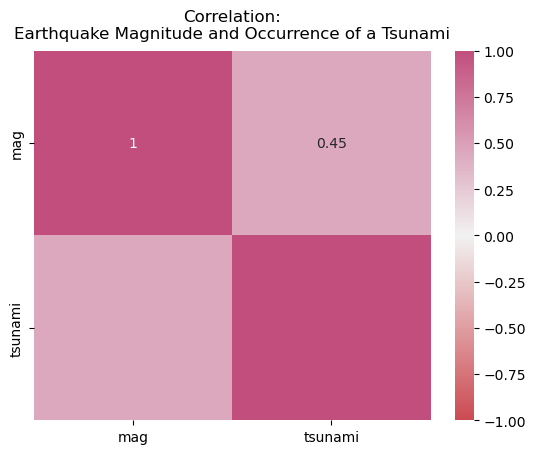

In [74]:
# Preparation:   Import libraries and load dataset
import seaborn as sns
## Mandatory depencencies for Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Create heatmap (color-encoded matrix) using Seaborn
## Create custom diverging color palette for the cmap= parameter in .heatmap()
custom_cmap = sns.diverging_palette(10, 350, s=60, as_cmap=True)

## Use method chaining: query(), corr()
sns.heatmap(
    earthquakes.query('magType == "mb"')[['mag', 'tsunami']].corr(method='pearson'),
    annot=True,
    center=0,   # Specifies the value that 'centers' the colormap gradient
    vmin=-1,   # Anchor value; note the diverging legend to right (color bar)
               ## vmax is not necessary here; if not specified, vmin and vmax
               ## parameters are inferred from the data
    cmap=custom_cmap
)             

# Define aesthetics for heatmap
plt.yticks(rotation=90)  # Literally rotates the y-axis tick labels
plt.title('Correlation:\nEarthquake Magnitude and Occurrence of a Tsunami',
          y=1.01)

# Use display() for rich output
display()

### **Notes:**
> `pandas.DataFrame.corr`:
> * When using the Pandas `.corr()` method, the *method=* parameter defaults to 'pearson', so it is not technically necessary to specify it.
>   * However, I am doing that here to remind myself that there are different types of correlation coefficients ('kendall', 'spearman')
> <br>

> **Pearson Correlation Coefficient:**
> * "The Pearson correlation Coefficient is a number between -1 and 1 that measures the strength and direction of the relationship between two variables" (Scribbr, 2024).

### **Sources:**

> **In-Text:**
* Ch. 6, pp. 331-340
  * Section: *Correlations and Heatmaps* 

> **Supplemental:**
* Seaborn:
  * __[seaborn.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)__ <font color=slategray>(Accessed 2024, May)
  * __[seaborn.diverging_palette()](https://seaborn.pydata.org/generated/seaborn.diverging_palette.html)__ <font color=slategray>(Accessed 2024, May)
* Python Graph Gallery: __[Control color in seaborn heatmaps](https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/)__ <font color=slategray>(Accessed: 2024, May)
* HSLuv: __[A Human-Friendly alternative to HSL (color codes)](https://www.hsluv.org/)__ <font color=slategray>(Accessed: 2024, May)
* QuantHub: __[How to Read a Correlation Heatmap?](https://www.quanthub.com/how-to-read-a-correlation-heatmap/)__ <font color=slategray>(Accessed: 2024, May)
* GeeksforGeeks: __[How to create a seaborn correlation heatmap in Python?](https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/)__ <font color=slategray>(Updated: 2021, March 21)
* pandas.pydata: __[pandas.DataFrame.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)__ <font color=slategray>(Accessed 2024, May)
* W3Schools: __[Pandas - Data Correlations](https://www.w3schools.com/python/pandas/pandas_correlations.asp)__ <font color=slategray>(Accessed: 2024, May)
* Scribbr: __[Pearson Correlation Coefficient (r) | Guide & Examples](https://www.scribbr.com/statistics/pearson-correlation-coefficient/#:~:text=The%20Pearson%20correlation%20coefficient%20(r,the%20relationship%20between%20two%20variables.&text=When%20one%20variable%20changes%2C%20the,changes%20in%20the%20same%20direction.)__ <font color=slategray>(Revised: 2024, February 10)

***
***
# <font color=blue>**2.**</font> **Visualizations: Boxplots** <center> with Bounds (Tukey Fences)

> <font color=deeppink>Create a boxplot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5.
> > <font color=deeppink>The bounds will be at: <br>
> > <center> $Q1 - 1.5 x IQR$ <br>
> > <font color=deeppink>and </font><br>
> > <center> $Q3 + 1.5 x IQR$

> ~~ <font color=deeppink>Be sure to use the `quantile()` method on the data to make this easier.

> ~~ <font color=deeppink>Pick whichever orientation you prefer for the plot, but **make sure to use subplots.**

In [90]:
# Load dataset: Facebook data
Facebook = pd.read_csv('https://github.com/AlanaDAg/'
                       'Hands-On-Data-Analysis-with-Pandas-2nd-edition/blob/master/'
                       'ch_05/data/fb_stock_prices_2018.csv?raw=True', 
                       index_col='date', parse_dates=True)

# View DataFrame head
Facebook.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


Text(0.5, 1.1, 'Boxplots with Tukey Fence Bounds:\nFacebook Volume Traded and Closing Price')

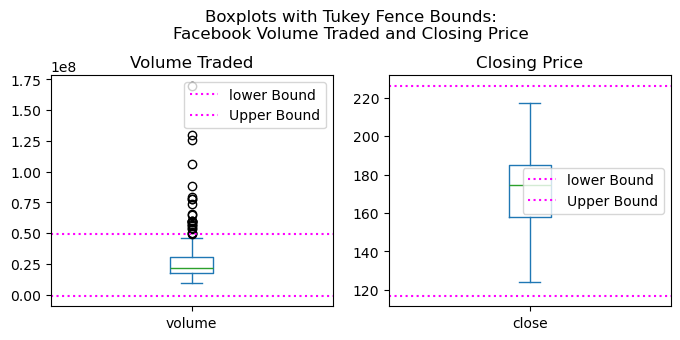

In [97]:
# Define variables for zip() function 
## Slicing DataFrame to create new DF for boxplots
columns = ['volume', 'close']
subset = Facebook[columns]
## Define the markers for the plot
axes = subset.plot(kind='box',
                   subplots=True,
                   figsize=(8, 3),
                   title=['Volume Traded', 'Closing Price']
)

# Define the bounds for finding outliers (using quantile() method)
quantiles = subset.quantile([0.25, 0.75])
# .loc[] to access the columns of the subset
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

# Create subplots using .zip() function
## Allows you to aggregate and combine elements from multiple iterables into one
for axes, col in zip(axes, columns):
    # Defining variables for Boxplots
    stats = quantiles[col]
    ## Lower and Upper bounds for IQR
    lower_bound = stats.loc[0.25] - 1.5 * stats['iqr']
    upper_bound = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, title in zip([lower_bound, upper_bound],
                            ['lower Bound', 'Upper Bound']):
        axes.axhline(
            bound,
            # Define aesthetics for boxplots (color, linestyle)
            color='fuchsia',
            linestyle='dotted',
            label=title)
        axes.legend()   # Places legend within plots (infers data when not defined)

# Define aesthetics for subplots (title)
plt.suptitle('Boxplots with Tukey Fence Bounds:\n'
             'Facebook Volume Traded and Closing Price',
             y=1.1)

### **Notes:**
> **Tukey Fences:**
> * The Tukey Fences method is also known as the Inter Quartile or IQR method
> <br>

> **zip() Function:**
> * "The `zip()` function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc" (W3Schools).

### **Sources:**

> **Textbook:**
* Ch. 6, pp. 329-331
  * Section: *Categorical data*

> **Supplemental:**
* Pandas.pydata:
  * __[pandas.DataFrame.quantile()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)__ <font color=slategray>(Accessed: 2024, May)
  * __[pandas.DataFrame.loc()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)__ <font color=slategray>(Accessed: 2024, May)
* Medium: __[Find Outliers in Data with Tukey Fences (IQR Method) in Python - Data Science Guide](https://medium.com/@BetterEverything/find-outliers-in-data-with-tukey-fences-iqr-method-in-python-data-science-guide-aa5cb11fd372)__ <font color=slategray>(2023, May 25)
* W3Schools:
  * __[Python zip() Function](https://www.w3schools.com/python/ref_func_zip.asp)__ <font color=slategray>(Accessed: 2024, May)
  * __[Matplotlib Plotting](https://https://www.w3schools.com/python/matplotlib_plotting.asp)__ <font color=slategray>(Accessed: 2024, May)

***
***
# <font color=blue>**3.**</font> **Visualizations: Line Graph** <center> with Dashed Line

> <font color=deeppink> Plot the evolution of cumulative COVID-19 cases worldwide, and add a dashed vertical line on the date that it suprassed 1 million.
> > <font color=deeppink>Be sure to format the tick labels on the y-axis accordingly.

In [98]:
# Load dataset: COVID-19 data
covid_19 = pd.read_csv('https://github.com/AlanaDAg/'
                    'Hands-On-Data-Analysis-with-Pandas-2nd-edition/blob/'
                    'master/ch_06/data/covid19_cases.csv?raw=True').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace('United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

# View DataFrame head
covid_19.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Croatia,HR,HRV,4076246.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Greece,EL,GRC,10724599.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Azerbaijan,AZ,AZE,10047719.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Bahrain,BH,BHR,1641164.0,Asia,0.0


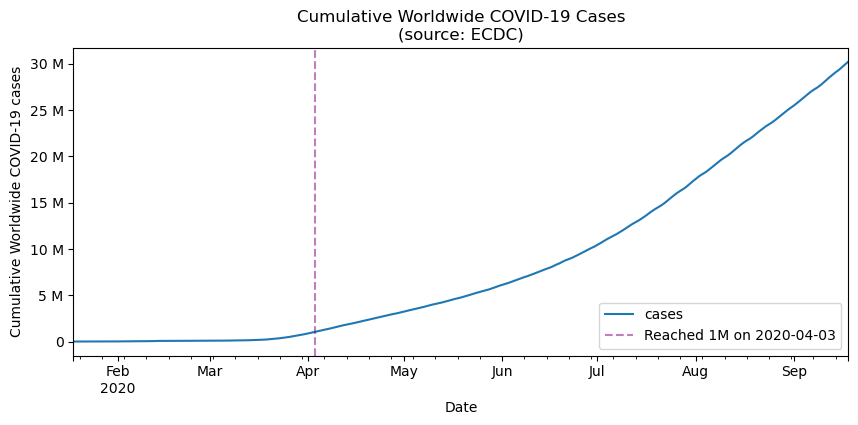

In [109]:
# Import libraries
## EngFormatter package allows us to use engineering notation
from matplotlib.ticker import EngFormatter

# Slice DataFrame and use method chaining
## Use .groupby() to customize and perform calculations
cumulative_cases = covid_19.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()

# Create Line graph and set axis labels
ax = cumulative_cases.plot(title='Cumulative Worldwide COVID-19 Cases\n'
                           '(source: ECDC)',
                           figsize=(10, 4))
ax.set_ylabel('Cumulative Worldwide COVID-19 cases')
ax.set_xlabel('Date')
# Define the major ticker formatting
ax.yaxis.set_major_formatter(EngFormatter())

# Create the dashed verticle line on plot
over_1M = cumulative_cases[cumulative_cases >= 1e6].index[0]
ax.axvline(over_1M,
           # Define plot aesthetics
           linestyle='dashed',
           color='purple',
           alpha=0.5,
           label=f"Reached 1M on {over_1M.strftime('%Y-%m-%d')}"
)

# Include legend within plot
ax.legend()
# Display plot using rich output
display()

### **Sources:**

> **Textbook:**
* Ch. 6, pp. 359-362
  * Section: *Formatting axes*

> **Supplemental:**
* Matplotlib:
  * __[matplotlib.ticker](https://matplotlib.org/stable/api/ticker_api.html)__ <font color=slategray>(Accessed: 2024, May)
  * __[Labeling ticks using engineering notation](https://matplotlib.org/stable/gallery/text_labels_and_annotations/engineering_formatter.html)__ <font color=slategray>(Accessed: 2024, May)
  * __[matplotlib.axis.Axis.set_major_formatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html)__ <font color=slategray>(Accessed: 2024, May)
  * __[matplotlib.pyplot.axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)__ <font color=slategray>(Accessed: 2024, May)

***
***
# <font color=blue>**4.**</font> **Visualizations: Line Graph** <center> with Shaded Rectangle

> <font color=deeppink> Use `axvspan()` to shade a rectangle from `'2018-07-25'` to `'2018-07-31'`, which marks the large decline in Facebook price on a line plot of the closing price.

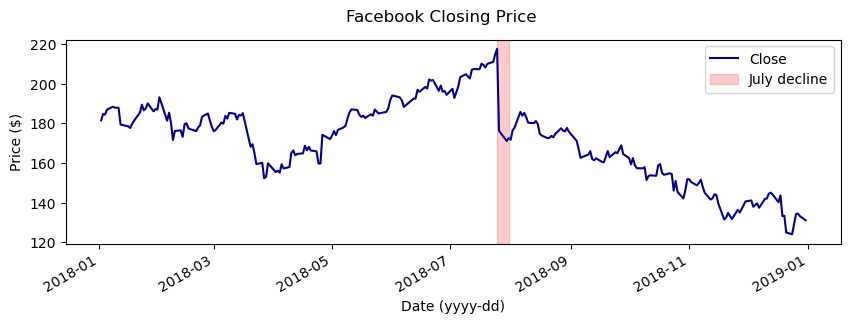

In [125]:
# Create line graph for the Facebook data
Facebook.close.plot(kind='line', figsize=(10, 3), color='darkblue')

# Use axvspan() function to add a vertical span (rectangle) across the plot axes
plt.axvspan(
    '2018-07-25', '2018-07-31', color='red', alpha=0.2, label='July decline',
)
# Define aesthetics for plot (axis labels, plot title, and include legend)
plt.ylabel('Price ($)')
plt.xlabel('Date (yyyy-dd)')
plt.suptitle('Facebook Closing Price')
# Include legend and set labels
plt.legend(['Close', 'July decline'])

# Display using rich output
display()

### **Sources:**

> **Textbook:**
* Ch. 6, pp. 368-377
  * Section: *Shading regions*

> **Supplemental:**
* Matplotlib:
  * __[matplotlib.pyplot.axvspan](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html)__ <font color=slategray>(Accessed: 2024, May)
  * __[matplotlib.pyplot.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.htmll)__ <font color=slategray>(Accessed: 2024, May

***
***
# <font color=blue>**5.**</font> **Visualizations: Line Graph** <center> with Event Annotations

> <font color=deeppink>Using the Facebook stock price data, annotate the following three(3) events on a line plot of the closing price:
>> <font color=blue>1.)</font> **Disappointing user growth announced after close** on July 25, 2018 <br><br>
>> <font color=blue>2.)</font> **Cambridge Analytica story breaks** on March 19, 2018 (when it affected the market) <br><br>
>> <font color=blue>3.)</font> **FTC launches investigation** on March 20, 2018

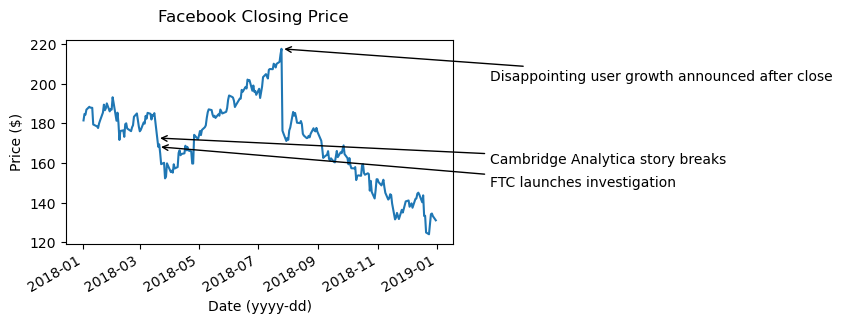

In [128]:
# Create line graph
Facebook.close.plot(kind='line', figsize=(5, 3))

# Define the events outlined in description
events = [
    ('Disappointing user growth announced after close', '2018-07-25'),
    ('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')
]

# Create random, repeatable number for jitter annotation
np.random.seed(1)

# Use for loop to iterate through multiple plot types
for text, date in events:
    y_value = Facebook.close[date]
    # random.uniform() method returns a random floating # between two specified #s
    jitter = np.random.uniform(-20, -10, 1)
    # Create annotations within plot
    ## Connect with the *text* parameters of events object
    plt.annotate(
        text, 
        xy=(date, y_value),
        xytext=('2019-02-25', y_value + jitter),
        arrowprops=dict(arrowstyle='->')
    )

# Define plot aesthetics (axis labels, title)
plt.ylabel('Price ($)')
plt.xlabel('Date (yyyy-dd)')
plt.suptitle('Facebook Closing Price')

# Display using rich output
display()

### **Sources:**

> **Textbook:**
* Ch. 6, pp. 328-331
  * Section: *Categorical data*

> **Supplemental:**
* Matplotlib:
  * __[matplotlib.pyplot.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)__ <font color=slategray>(Accessed: 2024, May)
* W3Schools: __[Python Random uniform() Method](https://www.w3schools.com/python/ref_random_uniform.asp)__ <font color=slategray>(Accessed: 2024, May)
* Medium: __[Jitter plots with Python's Seaborn](https://towardsdatascience.com/jitter-plots-with-pythons-seaborn-62188bf511b8)__ <font color=slategray>(2022, August 13)

***
***
# <font color=blue>**6.**</font> **Visualizations: Scatter Plot Colormaps** <center> Qualitative Colormap

> <font color=deeppink> Modify the `red_resid_plots()` function to use a `matplotlib` colormap instead of cycling between two colors.
> > <font color=deeppink>Remember, for this use case, we should pick a **qualitative** colormap to make our own.

In [155]:
# original DataFrame from textbook (p. 340)
fb_reg_data = Facebook.assign(
    log_volume=np.log(Facebook.volume),
    max_abs_change=Facebook.high - Facebook.low
).iloc[:,-2:]

# Import libraries and packages
import itertools
from matplotlib import cm

# Define custom function that includes several, nested for-loops
## Modified from textbook version found on p. 342
def reg_resid_plots(fb_reg_data):

    # Define variables
    num_cols = fb_reg_data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    # Create subplots
    fig, ax = plt.subplots(
        permutation_count, 
        2, 
        figsize=(15, 4 * permutation_count)
    )

    # zip() function to modify the coloring of plots
    ## Change from cycling to using matplotlib colormap (cm)
    for (x, y), axes, color in zip(
        itertools.permutations(fb_reg_data.columns, 2), 
        ax,
        # Matplotlib colormap (cm)
        [cm.Set1(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=fb_reg_data, ax=subplot, color=color)
            
            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')
                
    # Return statement so the loop returns one object
    return fig.axes

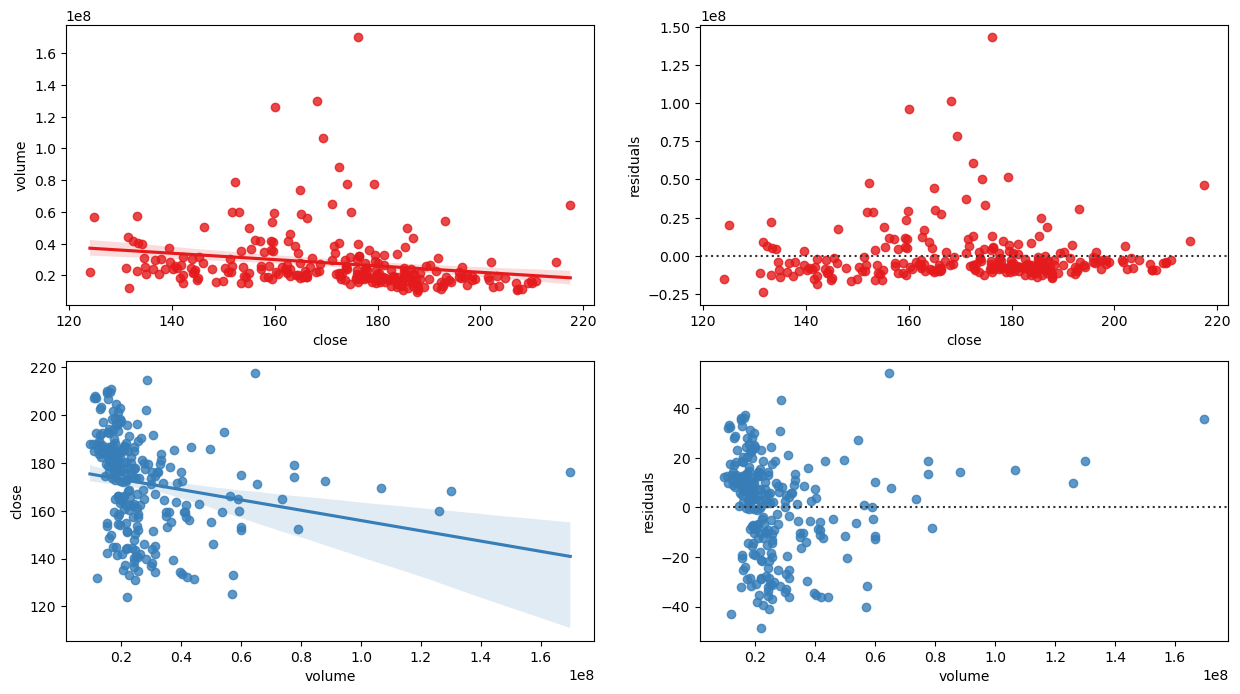

In [154]:
# Text function defined above
reg_resid_plots(Facebook[['close', 'volume']])
# Display using rich output
display()

### **Sources:**

> **In-Text:**
* Ch. 6, pp. 342-345
  * Section: *Regression plots*

> **Supplemental:**
* Python.org: __[`itertools` - Functions creating iterators for efficient looping](https://docs.python.org/3/library/itertools.html)__ <font color=slategray>(Accessed: 2024, May)
* Python Cheatsheet: __[Python Itertools Module](https://www.pythoncheatsheet.org/modules/itertools-module)__ <font color=slategray>(Accessed: 2024, May)
* Matplotlib: __[Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)__ <font color=slategray>(Accessed: 2024, May)

***
***
***